# Introduction and Deployment of VLM: BLIP

## VLM: Vision-Language Model
Generative AI model that takes input image files and outputs text from a large-language model. BLIP (Bootstrapped Language-Image Pretraining) is a VLM framework that has both image-text captioning and image-text retrieval capabilities. 

For this part of the lab, you will test BLIP's image-text captioning as an introduction to how these models understand input images and reason/describe it to produce and output text caption.

The below code implements BLIP through [HuggingFace](https://huggingface.co/docs/transformers/model_doc/blip). Walk through each cell of the notebook to test the VLM model on images from the Salesforce pretrained checkpoint, robot task images stored in the repository, and your own unique image.

#### Environment Requirements:
* Python env
* ipykernel
* matplotlib

### (A) Run BLIP Image-Captioning with Salesforce checkpoint image database

Run the following cell to visualize the chosen input image from the Salesforce image base and the resulting model generated caption.

1. Does the caption seem appropriate for the input image?
2. Does the caption fully capture what is happening/depicted in the input image?
3. How would you modify the caption to make it more descriptive of the image?

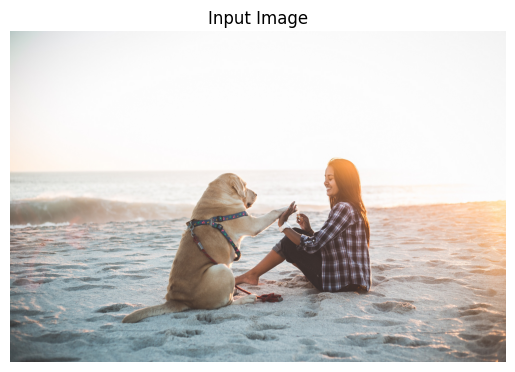

Output Caption:  a woman sitting on the beach with her dog


In [31]:
# Image from Checkpoint

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt

# 1. Load BLIP model & Processor from HuggingFace (https://huggingface.co/docs/transformers/model_doc/blip)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# 2. Load demo image from URL
image_url = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

# 3. Display input image
plt.imshow(image)
plt.axis('off')
plt.title('Input Image')
plt.show()

# 4. Prepare input image to feed into model
inputs = processor(image, return_tensors="pt")

# 5. Generate output caption
out = model.generate(**inputs)
print("Output Caption: ", processor.decode(out[0], skip_special_tokens=True))


### (B) Run BLIP Image-Captioning with Pre-chosen Robot Task Images

Run the following cell to visualize the resulting model generated caption from one of the pre-saved robot task images in the repository. There are 5 pre-saved images. 

\[Optional] To see the generated caption from a specific image in this directory, comment out the code to chose a random image from the directory and replace `selected_image` with the specific filename.

1. Does the caption seem appropriate for the input image?
2. Does the caption fully capture what is happening/depicted in the input image?
3. How would you modify the caption to make it more descriptive of the image?

Run the model several times to view the resulting captions for more than one of the pre-chosen images.

4. How does the caption accuracy/fit compare between different images?

Selected image from directory robot_task_images: robot_task_images/pickplace.png


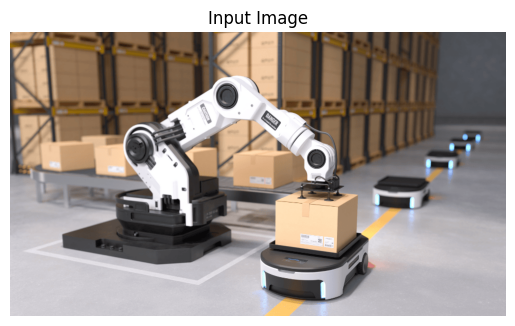

Output Caption:  a robot is standing on a pal in a warehouse


In [32]:
# Repository Image

import glob
import random

# 1. Load BLIP model & Processor from HuggingFace (https://huggingface.co/docs/transformers/model_doc/blip)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# 2. Load pre-chosen robot task image from local file
directory_path = 'robot_task_images/'
extension = '*.png'
image_files = glob.glob(f'{directory_path}{extension}')
if image_files:
    selected_image = random.choice(image_files)
    print(f'Selected image from directory robot_task_images: {selected_image}')
else:
    print(f'No image files found in directory {directory_path}.')

image = Image.open(selected_image).convert("RGB")

# 3. Display input image
plt.imshow(image)
plt.axis('off')
plt.title('Input Image')
plt.show()

# 4. Prepare input image to feed into model
inputs = processor(image, return_tensors="pt")

# 5. Generate output caption
out = model.generate(**inputs)
print("Output Caption: ", processor.decode(out[0], skip_special_tokens=True))


### (C) Run BLIP Image-Captioning with Custom Image(s)

Run the following cell to visualize the resulting model generated caption from a new image of your choice by modifying the `image_path` string.

1. Does the caption seem appropriate for the input image?
2. Does the caption fully capture what is happening/depicted in the input image?
3. How would you modify the caption to make it more descriptive of the image?

Run the model as many times as you would like with new images to compare the results across images the model hasn't seen the checkpoint's training.

4. How does the caption accuracy/fit compare between different images?

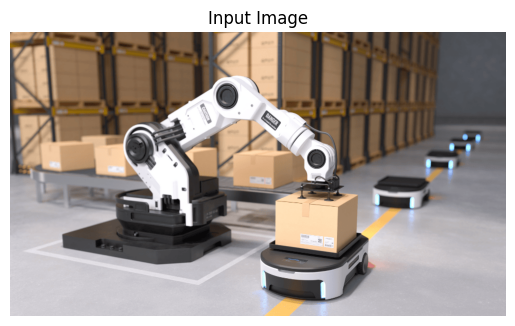

Output Caption:  a robot is standing on a pal in a warehouse


In [33]:
# Custom Image

# 1. Load BLIP model & Processor from HuggingFace (https://huggingface.co/docs/transformers/model_doc/blip)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# 2. Load pre-chosen robot task image from local file
#image_path = 'path-to-your-image.png' # Replace with your image path
image_path = 'robot_task_images/pickplace.png' # Replace with your image path
image = Image.open(image_path).convert("RGB")

# 3. Display input image
plt.imshow(image)
plt.axis('off')
plt.title('Input Image')
plt.show()

# 4. Prepare input image to feed into model
inputs = processor(image, return_tensors="pt")

# 5. Generate output caption
out = model.generate(**inputs)
print("Output Caption: ", processor.decode(out[0], skip_special_tokens=True))


## References

* [HuggingFace BLIP](https://huggingface.co/docs/transformers/model_doc/blip)
* [Salesforce BLIP GitHub Repository](https://github.com/salesforce/BLIP)
* [BLIP: Bootstrapping Langauge-Image Pre-training for Unified Vision Language Understanding and Generation - ArXiv](https://arxiv.org/abs/2201.12086)
* [BLIP Blog](https://www.salesforce.com/blog/blip-bootstrapping-language-image-pretraining/)